# Relation between root of answer and root of sentence
We want to see if there is some similarities between instances of the data, when looking at the grammatical role of the sought answer in the sentence containing it. In order to look at this, the following functionality is used:
https://udon2.github.io/utilities/#getting-a-chain-of-deprels-between-the-nodes

In [58]:
import stanza
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import udon2
from udon2.helpers import get_deprel_chain

In [10]:
# Load the dataframe consisting of the data
df = pd.read_pickle("../data_frames/parsed_answer_data/df_train_cleaned.pkl")
df.head()

,choices,context,question,correct_answer,correct_answer_parsed,correct_answer_parsed_tok,correct_answer_parsed_stop,correct_answer_parsed_lemma,correct_answer_parsed_lemma_stop,correct_answer_loc,...,answer_location,sent_with_ans,answer_locations_text,paragraph_len,loc_frac,context_parsed,context_parsed_tok_lemma,context_parsed_tok_lemma_stop,context_parsed_tok_stop,context_parsed_tok
0,"[{'end': 224, 'extra': None, 'start': 175, 'te...",Visum för affärs- och konferensbesök\r\nOm du ...,Vad är ett visum?,ett tillstånd för att resa in och vara i ett land,ett tillstånd för att resa in och vara i ett land,"[ett, tillstånd, för, att, resa, in, och, vara...","[tillstånd, resa, in, land]","[en, tillstånd, för, att, resa, in, och, vara,...","[tillstånd, resa, in, land]",175,...,2,visum är ett tillstånd för att resa in och var...,[2],21,0.095238,"[visum för affärs- och konferensbesök, om du s...","[[visa, för, affär, och, konferensbesök], [om,...","[[visa, affär, konferensbesök], [om, skola, be...","[[visum, affärs-, konferensbesök], [om, ska, b...","[[visum, för, affärs-, och, konferensbesök], [..."
1,"[{'end': 707, 'extra': None, 'start': 681, 'te...",Eget företag\r\nEfter beslut\r\nBeslutet skick...,Vad ska du ta med när du hämtar ditt beslut?,ditt pass,ditt pass,"[ditt, pass]",[pass],"[du, pass]",[pass],156,...,2,när du ska hämta ditt beslut ska du ta med dit...,"[2, 3]",19,0.105263,"[eget företag, efter beslut beslutet skickas t...","[[egen, företag], [efter, beslut, beslut, skic...","[[egen, företag], [efter, beslut, beslut, skic...","[[eget, företag], [efter, beslut, beslutet, sk...","[[eget, företag], [efter, beslut, beslutet, sk..."
2,"[{'end': 1165, 'extra': None, 'start': 1154, '...",Utbytesdoktorander\r\nIntervju\r\nDu kommer at...,Hur länge gäller ett uppehållstillstånd för be...,ett år,ett år,"[ett, år]",[år],"[en, år]",[år],1619,...,18,så länge gäller tillståndet ett uppehållstills...,[18],25,0.720000,"[utbytesdoktorander intervju, du kommer att få...","[[utbytesdoktorand, intervju], [du, komma, att...","[[utbytesdoktorand, intervju], [du, komma, få,...","[[utbytesdoktorander, intervju], [du, kommer, ...","[[utbytesdoktorander, intervju], [du, kommer, ..."
3,"[{'end': 598, 'extra': None, 'start': 589, 'te...",Eget företag\r\nNär vi har tagit emot din ansö...,Vad är ett uppehållstillståndskort?,ett bevis,ett bevis,"[ett, bevis]",[bevis],"[en, bevis]",[bevis],589,...,8,kortet är ett bevis på att du har tillstånd at...,[8],21,0.380952,"[eget företag, när vi har tagit emot din ansök...","[[egen, företag], [när, vi, ha, ta, emot, du, ...","[[egen, företag], [när, ta, emot, ansökan], [o...","[[eget, företag], [när, tagit, emot, ansökan],...","[[eget, företag], [när, vi, har, tagit, emot, ..."
4,"[{'end': 1932, 'extra': None, 'start': 1924, '...",Flytta tillbaka till Sverige\r\nSå ansöker du\...,Vad är ett uppehållstillståndskort?,ett bevis,ett bevis,"[ett, bevis]",[bevis],"[en, bevis]",[bevis],673,...,8,kortet är ett bevis på att du har tillstånd at...,[8],21,0.380952,"[flytta tillbaka till sverige, så ansöker du d...","[[flytta, tillbaka, till, Sverige], [så, ansök...","[[flytta, tillbaka, Sverige], [så, ansöka, du,...","[[flytta, tillbaka, sverige], [så, ansöker, du...","[[flytta, tillbaka, till, sverige], [så, ansök..."


In [9]:
stanza.download('sv', processors='tokenize,pos,lemma,depparse')
nlp = stanza.Pipeline(lang='sv', processors='tokenize,pos,lemma,depparse')


# Example usage
doc = nlp('Du behöver ta med ditt pass.')

print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

# testing udon2 functionality
roots = udon2.Importer.from_stanza(nlp("Du behöver ta med ditt pass.").to_dict())
r = roots[0]
print(roots[0])
n1 = r.select_by("form", "ta")[0] # root of the sentence that the answer is in
n2 = r.select_by("form", "pass")[0] # the root of the answer phrase
ci = get_deprel_chain(n1, n2)
print('direct: ', ci.direct)   # prints ''
print('reverse: ', ci.reverse)  # prints ''

2022-02-15 15:02:01 INFO: Downloading these customized packages for language: sv (Swedish)...
| Processor | Package   |
-------------------------
| tokenize  | talbanken |
| pos       | talbanken |
| lemma     | talbanken |
| depparse  | talbanken |
| pretrain  | talbanken |

2022-02-15 15:02:01 INFO: File exists: /Users/filippakarrfelt/stanza_resources/sv/tokenize/talbanken.pt.
2022-02-15 15:02:01 INFO: File exists: /Users/filippakarrfelt/stanza_resources/sv/pos/talbanken.pt.
2022-02-15 15:02:01 INFO: File exists: /Users/filippakarrfelt/stanza_resources/sv/lemma/talbanken.pt.
2022-02-15 15:02:01 INFO: File exists: /Users/filippakarrfelt/stanza_resources/sv/depparse/talbanken.pt.
2022-02-15 15:02:01 INFO: File exists: /Users/filippakarrfelt/stanza_resources/sv/pretrain/talbanken.pt.
2022-02-15 15:02:01 INFO: Finished downloading models and saved to /Users/filippakarrfelt/stanza_resources.
2022-02-15 15:02:01 INFO: Loading these models for language: sv (Swedish):
| Processor | Package  

id: 1	word: Du	head id: 3	head: ta	deprel: nsubj
id: 2	word: behöver	head id: 3	head: ta	deprel: aux
id: 3	word: ta	head id: 0	head: root	deprel: root
id: 4	word: med	head id: 3	head: ta	deprel: compound:prt
id: 5	word: ditt	head id: 6	head: pass	deprel: nmod:poss
id: 6	word: pass	head id: 3	head: ta	deprel: obj
id: 7	word: .	head id: 3	head: ta	deprel: punct
_|_|root
direct:  obj
reverse:  


In [11]:
# get root of a sentence
def get_root(doc): 
    for sentence in doc.sentences:
        for word in sentence.words:
            if word.deprel == 'root':
                return word.text

In [59]:
# collect the relations between the root of the answer and the sentence

def get_deprel_between_nodes(df):
    deprel_direct_relations = []
    deprel_reverse_relations = []
    sent_roots = []
    ans_roots = []
    num_matching_roots = 0
    num_missing_words = 0
    for index, row in df.iterrows():
        answer = row['correct_answer_parsed']
        sent_with_ans = row['sent_with_ans']
        ans_doc = nlp(answer)
        ans_root = get_root(ans_doc)
        ans_roots.append(ans_root)
        sent_doc = nlp(sent_with_ans)
        sent_root = get_root(sent_doc)
        sent_roots.append(sent_root)
        if ans_root == sent_root:
            num_matching_roots += 1
            # print('roots are matching! ', ans_root)
        roots = udon2.Importer.from_stanza(sent_doc.to_dict())
        r = roots[0]
        # check if exact root word of answer is in sentence
        if re.search(r'\b' + ans_root + r'\b', sent_with_ans):
            # we extract -> the deprel between the root of the sentence to the root of the answer
            n1 = r.select_by("form", sent_root)[0] # the root of the sentence
            n2 = r.select_by("form", ans_root)[0] # the root of the answer
            ci = get_deprel_chain(n1, n2)
            if ci.direct:
                deprel_direct_relations.append(ci.direct)
            else:
                deprel_direct_relations.append('NO DEPREL')
            deprel_reverse_relations.append(ci.reverse)
        else:
            # print('root not found: ', ans_root)
            num_missing_words += 1
            deprel_direct_relations.append('ROOT NOT FOUND')
            deprel_reverse_relations.append(None)
    print('number of matching roots: ', num_matching_roots)
    print('number of missing words: ', num_missing_words)
    return deprel_direct_relations, deprel_reverse_relations, ans_roots, sent_roots

In [44]:
df['direct deprel'], df['reverse deprel'], df['sentence root'], df['answer root'] = get_deprel_between_nodes(df)
df.head()

number of matching roots:  144
number of missing words:  21


,choices,context,question,correct_answer,correct_answer_parsed,correct_answer_parsed_tok,correct_answer_parsed_stop,correct_answer_parsed_lemma,correct_answer_parsed_lemma_stop,correct_answer_loc,...,loc_frac,context_parsed,context_parsed_tok_lemma,context_parsed_tok_lemma_stop,context_parsed_tok_stop,context_parsed_tok,direct deprel,reverse deprel,sentence root,answer root
0,"[{'end': 224, 'extra': None, 'start': 175, 'te...",Visum för affärs- och konferensbesök\r\nOm du ...,Vad är ett visum?,ett tillstånd för att resa in och vara i ett land,ett tillstånd för att resa in och vara i ett land,"[ett, tillstånd, för, att, resa, in, och, vara...","[tillstånd, resa, in, land]","[en, tillstånd, för, att, resa, in, och, vara,...","[tillstånd, resa, in, land]",175,...,0.095238,"[visum för affärs- och konferensbesök, om du s...","[[visa, för, affär, och, konferensbesök], [om,...","[[visa, affär, konferensbesök], [om, skola, be...","[[visum, affärs-, konferensbesök], [om, ska, b...","[[visum, för, affärs-, och, konferensbesök], [...",NO DEPREL,root,tillstånd,tillstånd
1,"[{'end': 707, 'extra': None, 'start': 681, 'te...",Eget företag\r\nEfter beslut\r\nBeslutet skick...,Vad ska du ta med när du hämtar ditt beslut?,ditt pass,ditt pass,"[ditt, pass]",[pass],"[du, pass]",[pass],156,...,0.105263,"[eget företag, efter beslut beslutet skickas t...","[[egen, företag], [efter, beslut, beslut, skic...","[[egen, företag], [efter, beslut, beslut, skic...","[[eget, företag], [efter, beslut, beslutet, sk...","[[eget, företag], [efter, beslut, beslutet, sk...",obj,,pass,ta
2,"[{'end': 1165, 'extra': None, 'start': 1154, '...",Utbytesdoktorander\r\nIntervju\r\nDu kommer at...,Hur länge gäller ett uppehållstillstånd för be...,ett år,ett år,"[ett, år]",[år],"[en, år]",[år],1619,...,0.720000,"[utbytesdoktorander intervju, du kommer att få...","[[utbytesdoktorand, intervju], [du, komma, att...","[[utbytesdoktorand, intervju], [du, komma, få,...","[[utbytesdoktorander, intervju], [du, kommer, ...","[[utbytesdoktorander, intervju], [du, kommer, ...",conj.obl,,år,gäller
3,"[{'end': 598, 'extra': None, 'start': 589, 'te...",Eget företag\r\nNär vi har tagit emot din ansö...,Vad är ett uppehållstillståndskort?,ett bevis,ett bevis,"[ett, bevis]",[bevis],"[en, bevis]",[bevis],589,...,0.380952,"[eget företag, när vi har tagit emot din ansök...","[[egen, företag], [när, vi, ha, ta, emot, du, ...","[[egen, företag], [när, ta, emot, ansökan], [o...","[[eget, företag], [när, tagit, emot, ansökan],...","[[eget, företag], [när, vi, har, tagit, emot, ...",NO DEPREL,root,bevis,bevis
4,"[{'end': 1932, 'extra': None, 'start': 1924, '...",Flytta tillbaka till Sverige\r\nSå ansöker du\...,Vad är ett uppehållstillståndskort?,ett bevis,ett bevis,"[ett, bevis]",[bevis],"[en, bevis]",[bevis],673,...,0.380952,"[flytta tillbaka till sverige, så ansöker du d...","[[flytta, tillbaka, till, Sverige], [så, ansök...","[[flytta, tillbaka, Sverige], [så, ansöka, du,...","[[flytta, tillbaka, sverige], [så, ansöker, du...","[[flytta, tillbaka, till, sverige], [så, ansök...",NO DEPREL,root,bevis,bevis


In [45]:
df_deprel = pd.DataFrame(df['correct_answer_parsed'])
df_deprel['sentence w answer'] = df['sent_with_ans']
df_deprel['sentence root'] = df['sentence root']
df_deprel['answer root'] = df['answer root']
df_deprel['direct deprel'] = df['direct deprel']
df_deprel['reverse deprel'] = df['reverse deprel']
df_deprel['sentence root'] = df['sentence root']
df_deprel['answer root'] = df['answer root']
df_deprel.head()

,correct_answer_parsed,sentence w answer,sentence root,answer root,direct deprel,reverse deprel
0,ett tillstånd för att resa in och vara i ett land,visum är ett tillstånd för att resa in och var...,tillstånd,tillstånd,NO DEPREL,root
1,ditt pass,när du ska hämta ditt beslut ska du ta med dit...,pass,ta,obj,
2,ett år,så länge gäller tillståndet ett uppehållstills...,år,gäller,conj.obl,
3,ett bevis,kortet är ett bevis på att du har tillstånd at...,bevis,bevis,NO DEPREL,root
4,ett bevis,kortet är ett bevis på att du har tillstånd at...,bevis,bevis,NO DEPREL,root


In [47]:
# print some examples from each of the data classes:
def save_deprel_statistics(filename, df, title):
    with open(filename, 'w') as out:
        out.write(title+ '\n')
        for index, row in df.iterrows():
            out.write('-------------------'+ '\n')
            out.write('sentence: ' + row['sentence w answer'] + '\n')
            out.write('answer: ' + row['correct_answer_parsed'] + '\n')
            out.write('sentence root: ' + row['sentence root'] + '\n')
            out.write('answer root: ' + row['answer root'] + '\n')
            if row['direct deprel']:
                out.write('direct deprel: ' + row['direct deprel'] + '\n')
            if row['reverse deprel']:
                out.write('reverse deprel: ' + row['reverse deprel'] + '\n')

save_deprel_statistics('figures/deprel/deprel.txt', df_deprel, 'Deprel raw data')

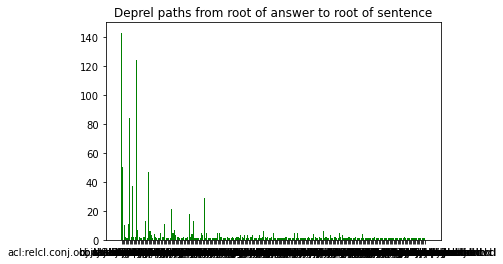

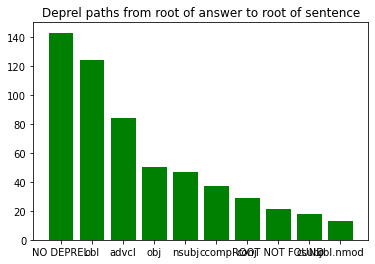

{'NO DEPREL': 143, 'obl': 124, 'advcl': 84, 'obj': 50, 'nsubj': 47, 'ccomp': 37, 'conj': 29, 'ROOT NOT FOUND': 21, 'csubj': 18, 'obl.nmod': 13}


In [65]:
def print_stats(stats, title):
    plt.bar(stats.keys(), stats.values(), color='g')
    plt.title('Deprel paths from root of answer to root of sentence')
    plt.show()

def plot_deprel_stats(df):
    stats = {}
    for index, row in df.iterrows():
        deprel = row['direct deprel']
        if deprel and deprel in stats:
            stats[deprel] += 1
        elif deprel:
            stats[deprel] = 1
    # plot stats
    # get biggest objects
    max_stats = {}
    vals, keys = zip(*sorted(zip(list(stats.values()), list(stats.keys()))))
    size = len(keys)
    for i in range(10):
        key = keys[size-i-1]
        max_stats[key] = stats[key]


    print_stats(stats, 'Deprel paths from root of answer to root of sentence')
    print_stats(max_stats, 'Top 10 deprel paths from root of answer to root of sentence')
    print(max_stats)

plot_deprel_stats(df_deprel)
